In [2]:
#!pip install openpyxl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df1 = pd.read_csv("C:/Users/RISHI/OneDrive/Desktop/Singapore Flat/singapore_flat.csv")

In [4]:
df1.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
remaining_lease         object
resale_price           float64
dtype: object

In [5]:
df1['month'].unique()

array(['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06',
       '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12',
       '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06',
       '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12',
       '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
       '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12',
       '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06',
       '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12',
       '2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06',
       '2022-07', '2022-08', '2022-09', '2022-10', '2022-11', '2022-12',
       '2023-01', '2023-02', '2023-03', '2023-04', '2023-05', '2023-06',
       '2023-07', '2023-08', '2023-09', '2023-10', 

In [6]:
df1[['Registered_Yr', 'Registered_Month']] = df1['month'].str.split('-',expand=True)

In [7]:
Pattern = r'(?:(\d{1,2})\s*year[s]?)?\s*(?:(\d{1,2})\s*month[s]?)?'
df1[['Lease_end_year', 'Lease_end_Month']] = df1['remaining_lease'].str.extract(Pattern)

In [8]:
df1['Lease_end_Month'] = df1['Lease_end_Month'].fillna(df1['Registered_Month'])

In [9]:
df1['Registered_Yr']=df1['Registered_Yr'].astype(int)
df1['Lease_end_year'] = df1['Lease_end_year'].astype(int)
df1['Registered_Month']= df1['Registered_Month'].astype(int)
df1['Lease_end_Month'] = df1['Lease_end_Month'].astype(int)

In [10]:
df1['Lease_end_year'] = df1['Lease_end_year'] + df1['Registered_Yr']

In [11]:
df1['Lease_end_Month'] = df1.apply(
    lambda x: x['Registered_Month'] if x['Lease_end_Month'] == 0 else x['Lease_end_Month'] + x['Registered_Month'],
    axis=1
)

In [12]:
df1['Lease_end_year'] = df1.apply(
    lambda x: x['Lease_end_year']+1 if x['Lease_end_Month'] > 12 else x['Lease_end_year'],
    axis=1
)

In [13]:
df1['Lease_end_Month'] = df1.apply(
    lambda x: x['Lease_end_Month']-12 if x['Lease_end_Month'] > 12 else x['Lease_end_Month'],
    axis=1
)

In [14]:
df1.head()


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,Registered_Yr,Registered_Month,Lease_end_year,Lease_end_Month
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,2017,1,2078,5
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,2017,1,2077,8
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,2017,1,2079,6
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,2017,1,2079,2
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,2017,1,2079,6


In [15]:
from dateutil.relativedelta import relativedelta
from datetime import datetime

def calculate_days(start_year, start_month, end_year, end_month):
    start_date = datetime(start_year, start_month, 1)
    end_date = datetime(end_year, end_month, 1)
    diff = relativedelta(end_date, start_date)
    total_days = (end_date - start_date).days
    return total_days

# Apply the function to each row
df1['Remaining_Lease_Days'] = df1.apply(
    lambda row: calculate_days(row['Registered_Yr'], row['Registered_Month'], row['Lease_end_year'], row['Lease_end_Month']),
    axis=1
)



In [16]:
df1[(df1['town'] == 'ANG MO KIO') & (df1['block'] == '116') & (df1['storey_range'] == '01 TO 03')]

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,Registered_Yr,Registered_Month,Lease_end_year,Lease_end_Month,Remaining_Lease_Days
36789,2018-10,ANG MO KIO,2 ROOM,116,ANG MO KIO AVE 4,01 TO 03,44.0,Improved,1978,58 years 07 months,185000.0,2018,10,2077,5,21397
66167,2020-02,ANG MO KIO,2 ROOM,116,ANG MO KIO AVE 4,01 TO 03,44.0,Improved,1978,57 years 03 months,192000.0,2020,2,2077,5,20909
117281,2022-08,ANG MO KIO,2 ROOM,116,ANG MO KIO AVE 4,01 TO 03,44.0,Improved,1978,54 years 10 months,218888.0,2022,8,2077,6,20028


In [17]:
df1['Flat_Address'] = df1['town'] + ' - ' + df1['street_name']
df1['Flat_Address'].value_counts()

Flat_Address
YISHUN - YISHUN RING RD               2707
PUNGGOL - PUNGGOL DR                  2066
BEDOK - BEDOK RESERVOIR RD            1989
PUNGGOL - PUNGGOL FIELD               1858
ANG MO KIO - ANG MO KIO AVE 10        1786
                                      ... 
BUKIT MERAH - SENG POH RD                6
SEMBAWANG - SEMBAWANG WAY                5
GEYLANG - GEYLANG EAST AVE 2             2
GEYLANG - ALJUNIED AVE 2                 1
MARINE PARADE - MARINE PARADE CTRL       1
Name: count, Length: 566, dtype: int64

In [18]:
df1.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price', 'Registered_Yr', 'Registered_Month',
       'Lease_end_year', 'Lease_end_Month', 'Remaining_Lease_Days',
       'Flat_Address'],
      dtype='object')

In [19]:
df1['flat_model'].value_counts()



flat_model
Model A                   65412
Improved                  45949
New Generation            23197
Premium Apartment         21070
Simplified                 7186
Apartment                  6928
Maisonette                 5279
Standard                   5086
DBSS                       3091
Model A2                   2144
Model A-Maisonette          333
Adjoined flat               328
Type S1                     305
Type S2                     164
2-room                      120
Premium Apartment Loft      108
Terrace                     100
Multi Generation             79
3Gen                         39
Improved-Maisonette          27
Premium Maisonette           14
Name: count, dtype: int64

In [20]:
from sklearn.preprocessing import LabelEncoder
import pickle



In [21]:
#mapping = dict(zip(le.classes_, range(len(le.classes_))))
#print("Label Encoding Mapping:", mapping)

In [22]:
#flat type encode
flat_type=df1['flat_type'].unique()
print (flat_type)
le1=LabelEncoder()
df1['encoded_flat_type'] = le1.fit_transform(df1['flat_type'])

with open('flat_type.pkl', 'wb') as file:
    pickle.dump(le1, file)

with open('flat_type.pkl', 'rb') as file:
    fte = pickle.load(file)

print (df1['encoded_flat_type'].unique())

['2 ROOM' '3 ROOM' '4 ROOM' '5 ROOM' 'EXECUTIVE' '1 ROOM'
 'MULTI-GENERATION']
[1 2 3 4 5 0 6]


In [23]:
#block encode
block=df1['block'].unique()
print (block)
le2=LabelEncoder()
df1['encoded_block'] = le2.fit_transform(df1['block'])

with open('block.pkl', 'wb') as file:
    pickle.dump(le2, file)

with open('block.pkl', 'rb') as file:
    fbe = pickle.load(file)

print (df1['encoded_block'].unique())

['406' '108' '602' ... '240A' '460D' '83A']
[1120   37 1733 ...  541 1305 2387]


In [24]:
#storey_range encode
storey_range=df1['storey_range'].unique()
print (storey_range)
le3=LabelEncoder()
df1['encoded_storey_range'] = le3.fit_transform(df1['storey_range'])

with open('storey_range.pkl', 'wb') as file:
    pickle.dump(le3, file)

with open('storey_range.pkl', 'rb') as file:
    fse = pickle.load(file)

print (df1['encoded_storey_range'].unique())

['10 TO 12' '01 TO 03' '04 TO 06' '07 TO 09' '13 TO 15' '19 TO 21'
 '22 TO 24' '16 TO 18' '34 TO 36' '28 TO 30' '37 TO 39' '49 TO 51'
 '25 TO 27' '40 TO 42' '31 TO 33' '46 TO 48' '43 TO 45']
[ 3  0  1  2  4  6  7  5 11  9 12 16  8 13 10 15 14]


In [25]:
#flat_model encode
flat_model=df1['flat_model'].unique()
print (flat_model)
le4=LabelEncoder()
df1['encoded_flat_model'] = le4.fit_transform(df1['flat_model'])

with open('flat_model.pkl', 'wb') as file:
    pickle.dump(le4, file)

with open('flat_model.pkl', 'rb') as file:
    fme = pickle.load(file)

print (df1['flat_model'].unique())

['Improved' 'New Generation' 'DBSS' 'Standard' 'Apartment' 'Simplified'
 'Model A' 'Premium Apartment' 'Adjoined flat' 'Model A-Maisonette'
 'Maisonette' 'Type S1' 'Type S2' 'Model A2' 'Terrace'
 'Improved-Maisonette' 'Premium Maisonette' 'Multi Generation'
 'Premium Apartment Loft' '2-room' '3Gen']
['Improved' 'New Generation' 'DBSS' 'Standard' 'Apartment' 'Simplified'
 'Model A' 'Premium Apartment' 'Adjoined flat' 'Model A-Maisonette'
 'Maisonette' 'Type S1' 'Type S2' 'Model A2' 'Terrace'
 'Improved-Maisonette' 'Premium Maisonette' 'Multi Generation'
 'Premium Apartment Loft' '2-room' '3Gen']


In [26]:
#Flat_Address encode
Flat_Address=df1['Flat_Address'].unique()
print (Flat_Address)
le5=LabelEncoder()
df1['encoded_Flat_Address'] = le5.fit_transform(df1['Flat_Address'])

with open('Flat_Address.pkl', 'wb') as file:
    pickle.dump(le5, file)

with open('Flat_Address.pkl', 'rb') as file:
    fae = pickle.load(file)

print (df1['Flat_Address'].unique())

['ANG MO KIO - ANG MO KIO AVE 10' 'ANG MO KIO - ANG MO KIO AVE 4'
 'ANG MO KIO - ANG MO KIO AVE 5' 'ANG MO KIO - ANG MO KIO AVE 1'
 'ANG MO KIO - ANG MO KIO AVE 3' 'ANG MO KIO - ANG MO KIO AVE 9'
 'ANG MO KIO - ANG MO KIO AVE 8' 'ANG MO KIO - ANG MO KIO AVE 6'
 'ANG MO KIO - ANG MO KIO ST 52' 'BEDOK - BEDOK NTH AVE 4'
 'BEDOK - BEDOK NTH AVE 1' 'BEDOK - BEDOK NTH RD'
 'BEDOK - BEDOK STH AVE 1' 'BEDOK - BEDOK RESERVOIR RD'
 'BEDOK - CHAI CHEE ST' 'BEDOK - BEDOK NTH ST 3' 'BEDOK - BEDOK STH RD'
 'BEDOK - CHAI CHEE AVE' 'BEDOK - NEW UPP CHANGI RD'
 'BEDOK - CHAI CHEE DR' 'BEDOK - BEDOK STH AVE 2'
 'BEDOK - BEDOK NTH AVE 3' 'BEDOK - BEDOK RESERVOIR VIEW'
 'BEDOK - CHAI CHEE RD' 'BEDOK - LENGKONG TIGA' 'BEDOK - BEDOK CTRL'
 'BEDOK - JLN DAMAI' 'BEDOK - BEDOK NTH AVE 2' 'BEDOK - BEDOK STH AVE 3'
 'BISHAN - SIN MING RD' 'BISHAN - SIN MING AVE' 'BISHAN - BISHAN ST 12'
 'BISHAN - BISHAN ST 13' 'BISHAN - BISHAN ST 22' 'BISHAN - BISHAN ST 24'
 'BISHAN - BISHAN ST 23' 'BISHAN - BRIGHT HILL DR' 'BI

In [27]:
df1.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price', 'Registered_Yr', 'Registered_Month',
       'Lease_end_year', 'Lease_end_Month', 'Remaining_Lease_Days',
       'Flat_Address', 'encoded_flat_type', 'encoded_block',
       'encoded_storey_range', 'encoded_flat_model', 'encoded_Flat_Address'],
      dtype='object')

In [28]:
df = df1[['encoded_Flat_Address','encoded_flat_type', 'encoded_block','encoded_storey_range','encoded_flat_model',
       'floor_area_sqm', 'Remaining_Lease_Days', 'resale_price' ]]

Text(0.5, 0, 'Remaining_Lease_Days')

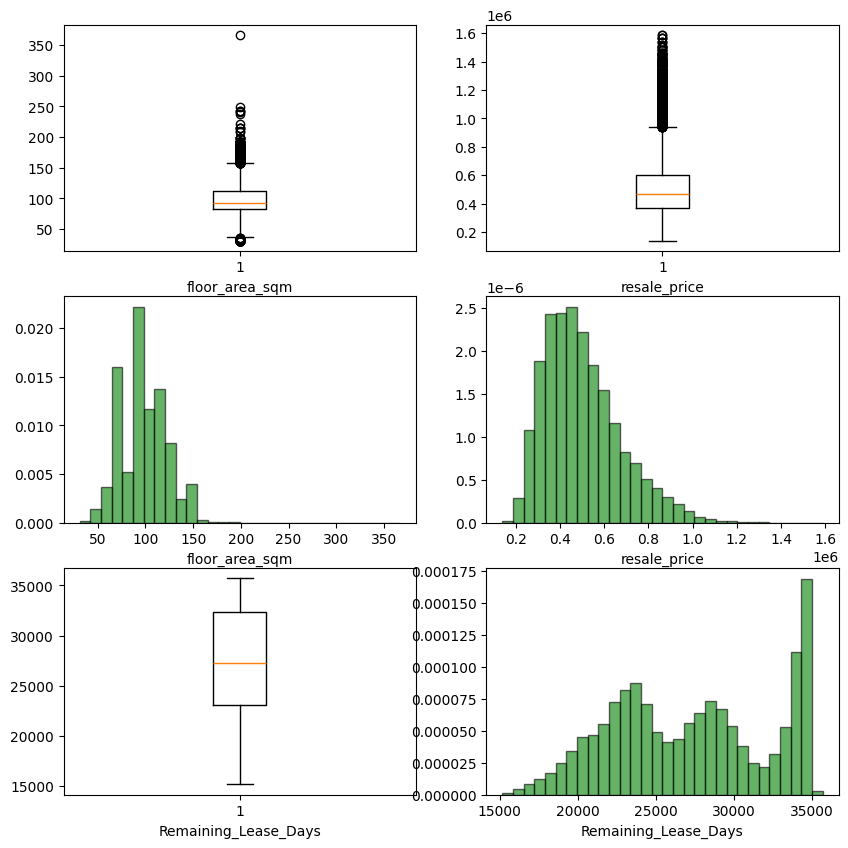

In [29]:
import matplotlib.pyplot as plt
fig,axs = plt.subplots(3,2,figsize=(10,10))
axs[0,0].boxplot(x=df['floor_area_sqm'])
axs[0,0].set_xlabel('floor_area_sqm')
axs[0,1].boxplot(x=df['resale_price'])
axs[0,1].set_xlabel('resale_price')
axs[1,0].hist(df['floor_area_sqm'],bins=30, density=True, alpha=0.6, color='g', edgecolor='black', label='Histogram')
axs[1,0].set_xlabel('floor_area_sqm')
axs[1,1].hist(df['resale_price'],bins=30, density=True, alpha=0.6, color='g', edgecolor='black', label='Histogram')
axs[1,1].set_xlabel('resale_price')
axs[2,0].boxplot(x=df['Remaining_Lease_Days'])
axs[2,0].set_xlabel('Remaining_Lease_Days')
axs[2,1].hist(df['Remaining_Lease_Days'],bins=30, density=True, alpha=0.6, color='g', edgecolor='black', label='Histogram')
axs[2,1].set_xlabel('Remaining_Lease_Days')

In [30]:
df['log_resale'] = np.log(df['resale_price'])
df['log_floorsqm'] = np.log(df['floor_area_sqm'])

C:\Users\RISHI\AppData\Local\Temp\ipykernel_9132\3746321709.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_resale'] = np.log(df['resale_price'])
C:\Users\RISHI\AppData\Local\Temp\ipykernel_9132\3746321709.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_floorsqm'] = np.log(df['floor_area_sqm'])


Text(0.5, 0, 'Remaining_Lease_Days')

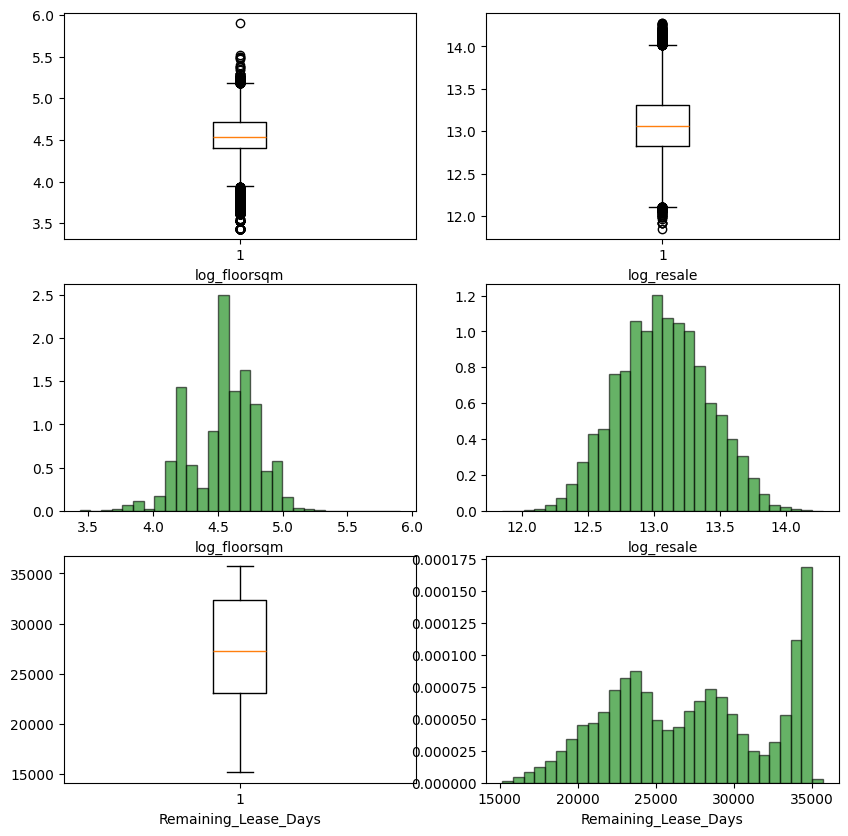

In [31]:
import matplotlib.pyplot as plt
fig,axs = plt.subplots(3,2,figsize=(10,10))
axs[0,0].boxplot(x=df['log_floorsqm'])
axs[0,0].set_xlabel('log_floorsqm')
axs[0,1].boxplot(x=df['log_resale'])
axs[0,1].set_xlabel('log_resale')
axs[1,0].hist(df['log_floorsqm'],bins=30, density=True, alpha=0.6, color='g', edgecolor='black', label='Histogram')
axs[1,0].set_xlabel('log_floorsqm')
axs[1,1].hist(df['log_resale'],bins=30, density=True, alpha=0.6, color='g', edgecolor='black', label='Histogram')
axs[1,1].set_xlabel('log_resale')
axs[2,0].boxplot(x=df['Remaining_Lease_Days'])
axs[2,0].set_xlabel('Remaining_Lease_Days')
axs[2,1].hist(df['Remaining_Lease_Days'],bins=30, density=True, alpha=0.6, color='g', edgecolor='black', label='Histogram')
axs[2,1].set_xlabel('Remaining_Lease_Days')

In [32]:
c = ['log_resale', 'log_floorsqm','Remaining_Lease_Days']
df[c].skew()

log_resale              0.064344
log_floorsqm           -0.426990
Remaining_Lease_Days   -0.006652
dtype: float64

In [33]:
model_col = df[['encoded_Flat_Address', 'encoded_flat_type', 'encoded_block',
       'encoded_storey_range', 'encoded_flat_model',
       'Remaining_Lease_Days','log_resale', 'log_floorsqm']]

In [34]:
model_col.corr()

,encoded_Flat_Address,encoded_flat_type,encoded_block,encoded_storey_range,encoded_flat_model,Remaining_Lease_Days,log_resale,log_floorsqm
encoded_Flat_Address,1.000000,0.099465,0.056664,-0.055446,-0.085231,0.208489,-0.015617,0.095276
encoded_flat_type,0.099465,1.000000,0.052622,0.029719,-0.324465,0.183636,0.651626,0.944935
encoded_block,0.056664,0.052622,1.000000,-0.002193,-0.017354,0.125924,0.008287,0.056318
encoded_storey_range,-0.055446,0.029719,-0.002193,1.000000,-0.040675,0.274768,0.324238,0.002781
encoded_flat_model,-0.085231,-0.324465,-0.017354,-0.040675,1.000000,-0.124986,-0.243448,-0.313604
Remaining_Lease_Days,0.208489,0.183636,0.125924,0.274768,-0.124986,1.000000,0.358938,0.158161
log_resale,-0.015617,0.651626,0.008287,0.324238,-0.243448,0.358938,1.000000,0.652804
log_floorsqm,0.095276,0.944935,0.056318,0.002781,-0.313604,0.158161,0.652804,1.000000


In [35]:
#plt.figure(figsize=(10, 8))  # Adjust the size as needed
#sns.heatmap(model_col, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Show the plot
#plt.title('Correlation Heatmap')
#plt.show()

In [36]:
model_col.columns

Index(['encoded_Flat_Address', 'encoded_flat_type', 'encoded_block',
       'encoded_storey_range', 'encoded_flat_model', 'Remaining_Lease_Days',
       'log_resale', 'log_floorsqm'],
      dtype='object')

In [37]:
X=model_col[['encoded_Flat_Address', 'encoded_flat_type', 'encoded_block','encoded_storey_range', 'encoded_flat_model', 'Remaining_Lease_Days', 'log_floorsqm']]
y=model_col[['log_resale']].values

In [38]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeRegressor #LCO
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import pickle

In [39]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [40]:
scalerx1 = StandardScaler()
X_train_scaled = scalerx1.fit_transform(x_train)
scalery1 = StandardScaler()
y_train_scaled = scalery1.fit_transform(y_train)

In [41]:
with open('scalerx1.pkl', 'wb') as file:
    pickle.dump(scalerx1, file)
with open('scalerx1.pkl', 'rb') as file:
    scaled_datax = pickle.load(file)  

with open('scalery1.pkl', 'wb') as file:
    pickle.dump(scalery1, file)
with open('scalery1.pkl', 'rb') as file:
    scaled_datay = pickle.load(file) 

In [42]:
dtreg = DecisionTreeRegressor(max_depth=20, min_samples_leaf=4, min_samples_split=10,random_state=42)
dtreg.fit(X_train_scaled,y_train_scaled)
with open('dtreg_model1.pkl', 'wb') as file:
    pickle.dump(dtreg, file)
with open('dtreg_model1.pkl', 'rb') as file:
    dtreg_loaded_model = pickle.load(file)

In [43]:
x_test_scaled = scaled_datax.transform(x_test)
y_test_scaled = scaled_datay.transform(y_test)

In [44]:
y_predict_scaled = dtreg_loaded_model.predict((x_test_scaled))

In [45]:
r_scr = metrics.r2_score(y_test_scaled,y_predict_scaled)
print(r_scr)
print(metrics.mean_squared_error(y_test_scaled,y_predict_scaled))
print(np.sqrt(metrics.mean_squared_error(y_test_scaled,y_predict_scaled)))
print(metrics.mean_absolute_error(y_test_scaled,y_predict_scaled)) #for outlier in the data use MAE

0.9215148770338644
0.07883348016862009
0.28077300470063016
0.20029815281342261


In [46]:
y_pred = scalery1.inverse_transform(y_predict_scaled.reshape(-1, 1)).flatten()
print('Predictions in original scale:', y_pred)

y_pred_original = np.exp(y_pred)
print('Predictions in original scale:', y_pred_original)

Predictions in original scale: [13.1028143  13.38840664 12.89618636 ... 12.62087208 12.5010665
 13.27367122]
Predictions in original scale: [490320.3842734  652395.75050278 398788.45161038 ... 302813.40882662
 268623.62196799 581677.36762975]
